In [20]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Bagging Classifier for Moon Dataset

In [21]:
# Import libraries
from sklearn.datasets import make_moons
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Generate Moon Dataset
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Bagging Classifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1)

# Train Bagging Classifier
bag_clf.fit(X_train, y_train)

# Evaluate Bagging Classifier
print("Accuracy on Training Set: {:.2f}".format(bag_clf.score(X_train, y_train)))
print("Accuracy on Test Set: {:.2f}".format(bag_clf.score(X_test, y_test)))

                            

Accuracy on Training Set: 0.92
Accuracy on Test Set: 0.91


Plot the decision boundary of the Bagging Classifier for the Moon dataset




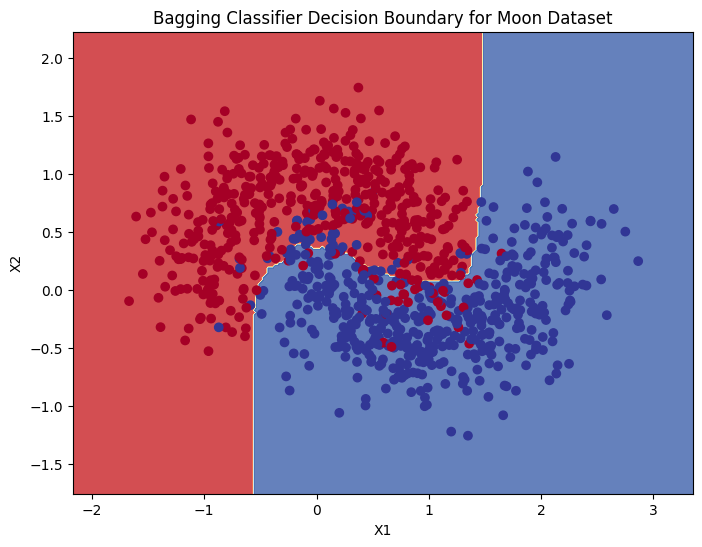

In [22]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Create Meshgrid to plot Decision Boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() -0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = bag_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot Decision Boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Bagging Classifier Decision Boundary for Moon Dataset")
plt.show()

### Random Forest Classifier for Moon Dataset

In [23]:
# Import libraries
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Generate Moon Dataset
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)

# Train Random Forest Classifier
rf_clf.fit(X_train, y_train)

# Evaluate Random Forest Classifier
print("Accuracy on Training Set: {:.2f}".format(rf_clf.score(X_train, y_train)))
print("Accuracy on Test Set: {:.2f}".format(rf_clf.score(X_test, y_test)))

Accuracy on Training Set: 0.93
Accuracy on Test Set: 0.93


Plot the decision boundary of the Random Forest Classifier for the Moon dataset

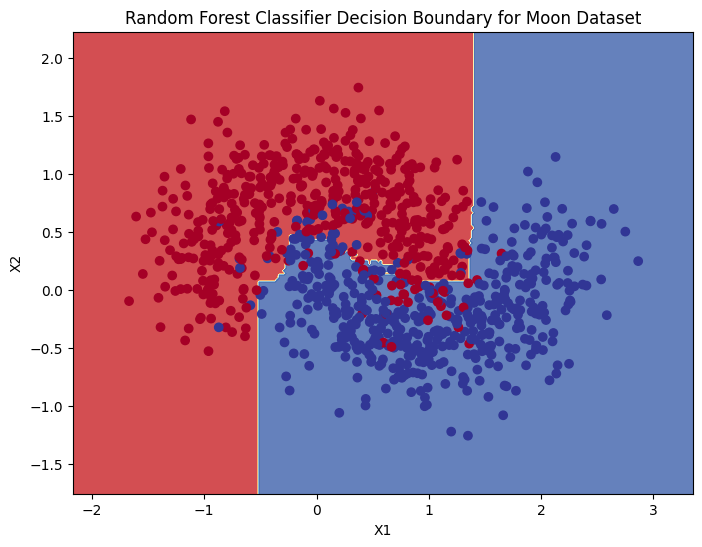

In [24]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Create Meshgrid to plot Decision Boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = rf_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot Decision Boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Random Forest Classifier Decision Boundary for Moon Dataset")
plt.show()


### AdaBoost Classifier for Moon Dataset


In [25]:
# Import libraries
from sklearn.datasets import make_moons
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Generate Moon Dataset
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize AdaBoost Classifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200,
                             algorithm="SAMME.R", learning_rate=0.5, random_state=42)

# Train AdaBoost Classifier
ada_clf.fit(X_train, y_train)

# Evaluate AdaBoost Classifier
print("Accuracy on Training Set: {:.2f}".format(ada_clf.score(X_train, y_train)))
print("Accuracy on Test Set: {:.2f}".format(ada_clf.score(X_test, y_test)))

Accuracy on Training Set: 0.95
Accuracy on Test Set: 0.92


Plot the decision boundary of the AdaBoost Classifier for the Moon dataset

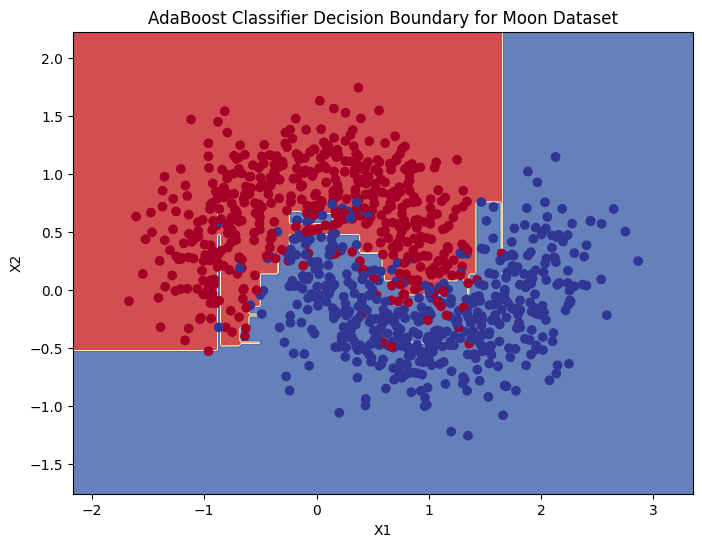

In [26]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Create Meshgrid to plot Decision Boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = ada_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot Decision Boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("AdaBoost Classifier Decision Boundary for Moon Dataset")
plt.show()

### [Show your creativity] Preforming hyperparameter tuning for improving accuracy 

In [17]:
# Use GridSearchCV from scikit-learn to search for the best hyperparaeters
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for each classifier
# Bagging Classifier
bagging_param_grid = {
    "n_estimators": [100, 500, 1000],
    "max_samples": [0.6, 0.8, 1.0]
}

# Random Forest Classifier
random_forest_param_grid = {
    "n_estimators": [100, 500, 1000],
    "max_features": ["auto", "sqrt", "log2"]
}

# AdaBoost Classifier
ada_boost_param_grid = {
    "n_estimators": [100, 500, 1000],
    "learning_rate": [0.01, 0.05, 0.1, 0.5]
}

# Perform GridSearchCV for each classifier and fit:
# Bagging Classifier
bagging_grid_search = GridSearchCV(bag_clf, bagging_param_grid, scoring="accuracy", cv=5)
bagging_grid_search.fit(X_train, y_train)

# Random Forest Classifier
random_forest_grid_search = GridSearchCV(rf_clf, random_forest_param_grid, scoring="accuracy", cv=5)
random_forest_grid_search.fit(X_train, y_train)

# AdaBoost Classifier
ada_boost_grid_search = GridSearchCV(ada_clf, ada_boost_param_grid, scoring="accuracy", cv=5)
ada_boost_grid_search.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                          learning_rate=0.5, n_estimators=200,
                                          random_state=42),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5],
                         'n_estimators': [100, 500, 1000]},
             scoring='accuracy')

In [18]:
# Print the best parameters and best accuracy for each classifier

print("Best Bagging parameters: ", bagging_grid_search.best_params_)
print("Best Bagging accuracy: ", bagging_grid_search.best_score_)

print("Best Random Forest parameters: ", random_forest_grid_search.best_params_)
print("Best Random Forest accuracy: ", random_forest_grid_search.best_score_)

print("Best AdaBoost parameters: ", ada_boost_grid_search.best_params_)
print("Best AdaBoost accuracy: ", ada_boost_grid_search.best_score_)

Best Bagging parameters:  {'max_samples': 0.6, 'n_estimators': 100}
Best Bagging accuracy:  0.9112500000000001
Best Random Forest parameters:  {'max_features': 'auto', 'n_estimators': 100}
Best Random Forest accuracy:  0.9112499999999999
Best AdaBoost parameters:  {'learning_rate': 0.01, 'n_estimators': 1000}
Best AdaBoost accuracy:  0.9087500000000001


In [19]:
# Train the classifiers with the best parameters and evaluate the improved accuracy

# Bagging Classifier
best_bagging_clf = bagging_grid_search.best_estimator_
best_bagging_accuracy = best_bagging_clf.score(X_test, y_test)
print("Improved Bagging accuracy: ", best_bagging_accuracy)

# Random Forest Classifier
best_random_forest_clf = random_forest_grid_search.best_estimator_
best_random_forest_accuracy = best_random_forest_clf.score(X_test, y_test)
print("Improved Random Forest accuracy: ", best_random_forest_accuracy)

# AdaBoost Classifier
best_ada_boost_clf = ada_boost_grid_search.best_estimator_
best_ada_boost_accuracy = best_ada_boost_clf.score(X_test, y_test)
print("Improved AdaBoost accuracy: ", best_ada_boost_accuracy)


Improved Bagging accuracy:  0.92
Improved Random Forest accuracy:  0.925
Improved AdaBoost accuracy:  0.9
